# Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Load Dataset

In [2]:
file_path = "C:\\Users\\akhil\\Downloads\\traffic_accidents.csv"
df = pd.read_csv(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [4]:
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [5]:
df.shape

(209306, 24)

# Visualization: Accidents by Hour

C:\Users\akhil\AppData\Local\Temp\ipykernel_13776\383060581.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["crash_hour"], palette="coolwarm")


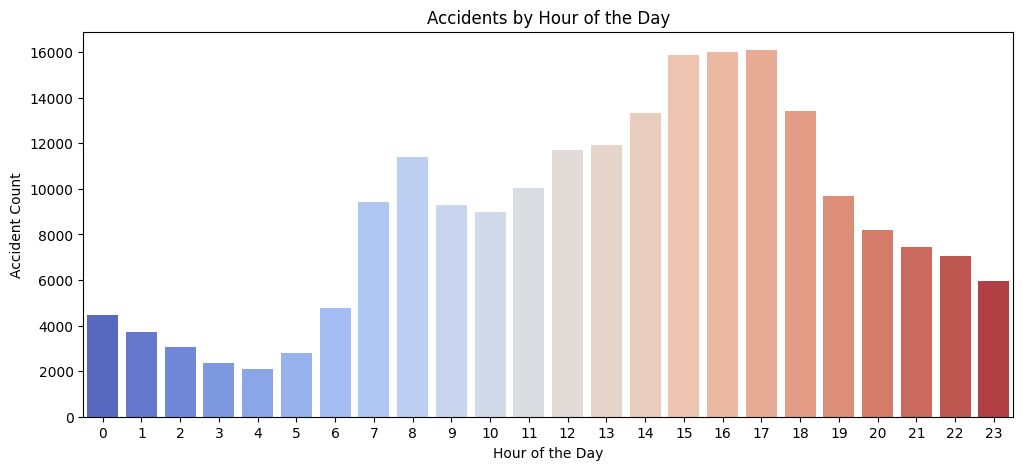

In [6]:
plt.figure(figsize=(12, 5))
sns.countplot(x=df["crash_hour"], palette="coolwarm")
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Accident Count")
plt.show()

# Visualization: Accidents by Day of the Week


C:\Users\akhil\AppData\Local\Temp\ipykernel_13776\3193136565.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["crash_day_of_week"], palette="magma")


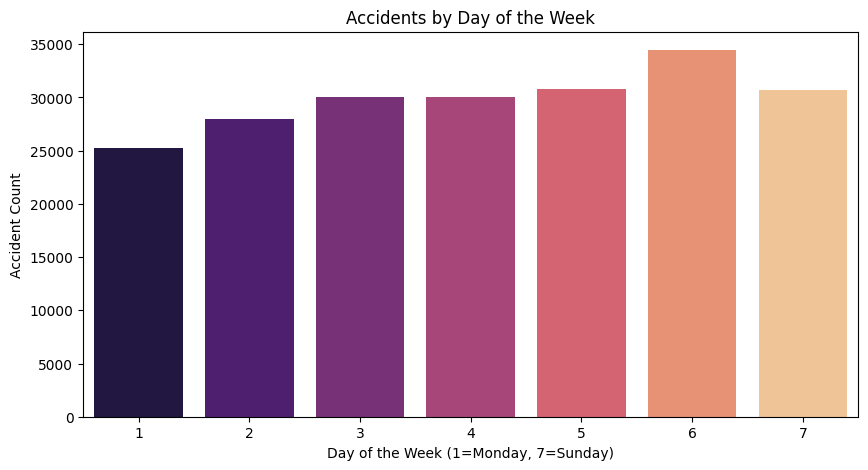

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["crash_day_of_week"], palette="magma")
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of the Week (1=Monday, 7=Sunday)")
plt.ylabel("Accident Count")
plt.show()

# Visualization: Accidents by Weather Condition

C:\Users\akhil\AppData\Local\Temp\ipykernel_13776\30971294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["weather_condition"], order=df["weather_condition"].value_counts().index, palette="coolwarm")


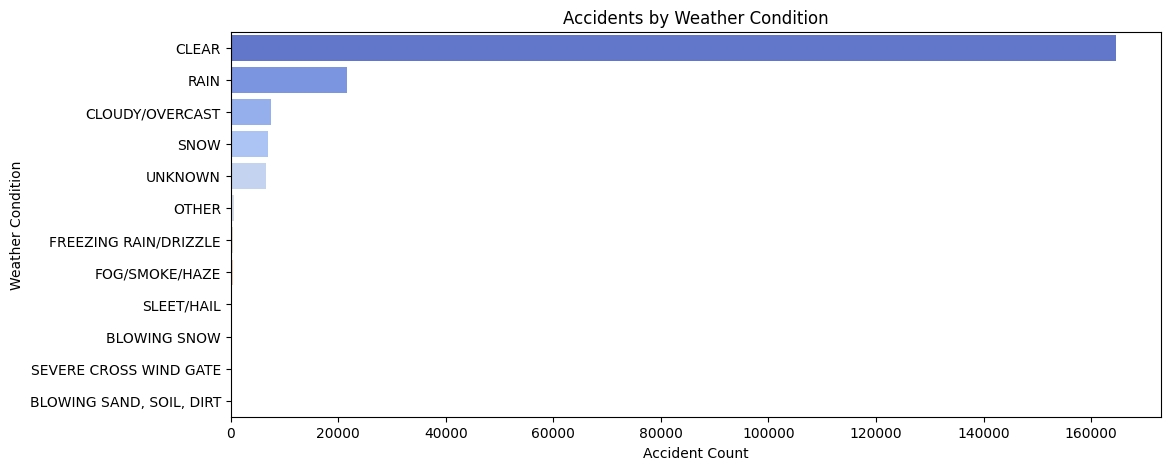

In [8]:
plt.figure(figsize=(12, 5))
sns.countplot(y=df["weather_condition"], order=df["weather_condition"].value_counts().index, palette="coolwarm")
plt.title("Accidents by Weather Condition")
plt.xlabel("Accident Count")
plt.ylabel("Weather Condition")
plt.show()

# Classification: Predicting Most Severe Injury
# Selecting Features

In [9]:
features = ["crash_hour", "crash_day_of_week", "crash_month", "num_units", "weather_condition", "roadway_surface_cond"]
label = "most_severe_injury"

In [10]:
# Convert Categorical Variables to Numeric
encoder = LabelEncoder()
df[label] = encoder.fit_transform(df[label])
for col in features:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])

# Splitting Data


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.2, random_state=42)

# Train Model


In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predictions

In [14]:
y_pred = model.predict(X_test)

# Evaluate Model

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("---------------------------------------------")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7187664230089341
---------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.07      0.01      0.01      1338
           2       0.74      0.97      0.84     30831
           3       0.23      0.04      0.07      6384
           4       0.12      0.01      0.03      3253

    accuracy                           0.72     41862
   macro avg       0.23      0.21      0.19     41862
weighted avg       0.59      0.72      0.63     41862

